# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 80.1MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/week6 /Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [5]:
plot_df = df.set_index('date_time')
plot_df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


<Figure size 1400x1000 with 0 Axes>

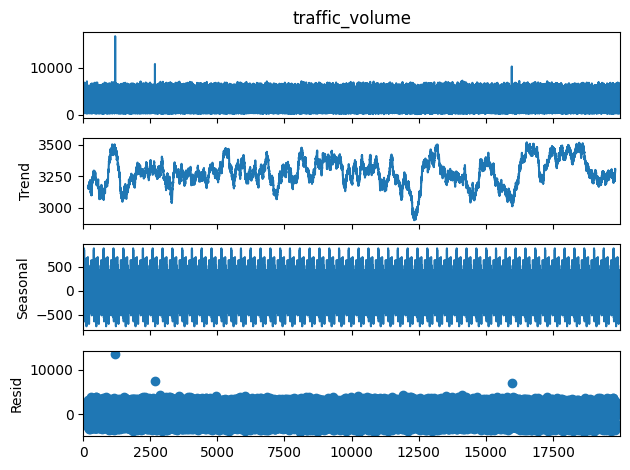

In [8]:
#Analyze trends, seasonality, and potential outliers.


df_cleaned = df.dropna(subset=['traffic_volume'])

df_filled = df.interpolate(method='linear')


decomposition = seasonal_decompose(df_cleaned['traffic_volume'], model='additive', period=365)  # Or use df_filled

plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

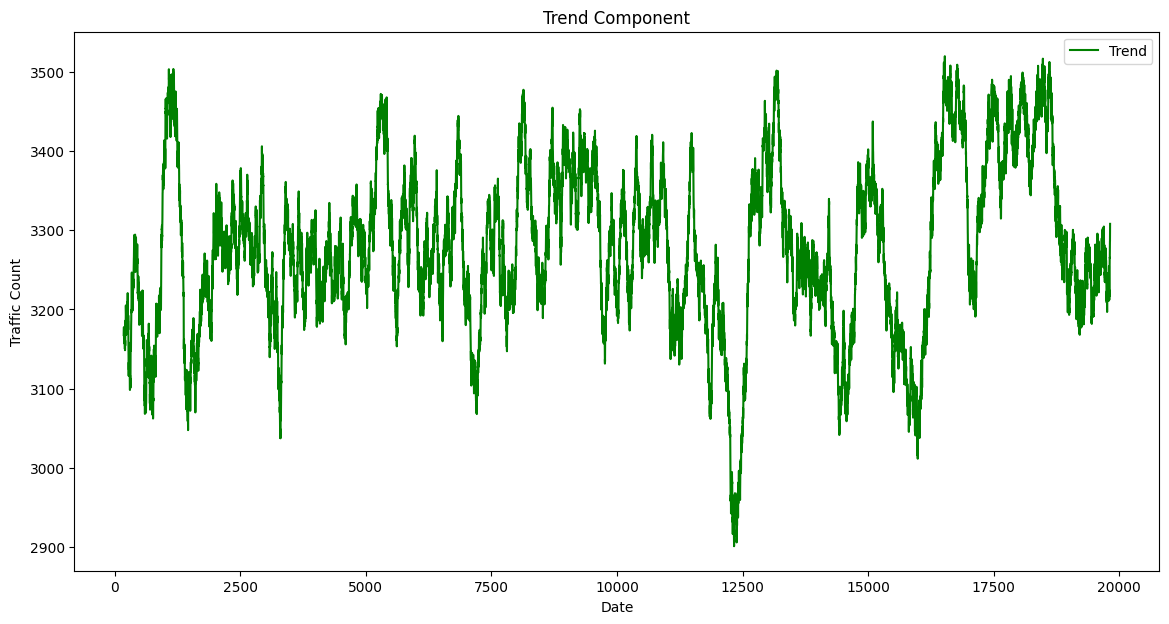

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.legend()
plt.show()


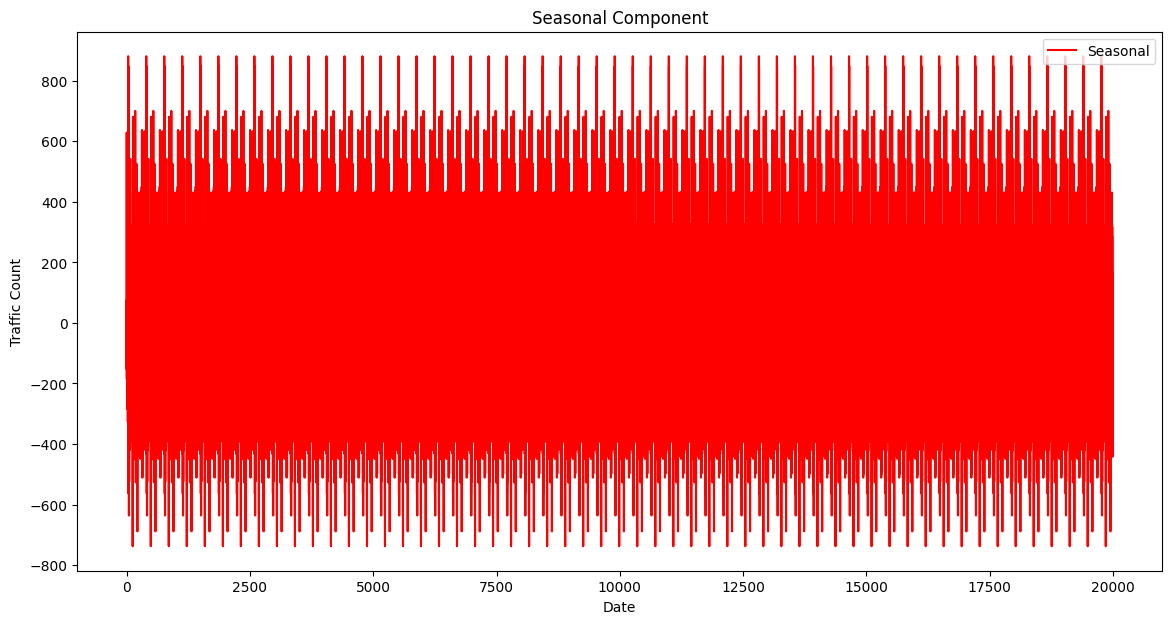

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(decomposition.seasonal, label='Seasonal', color='red')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.legend()
plt.show()

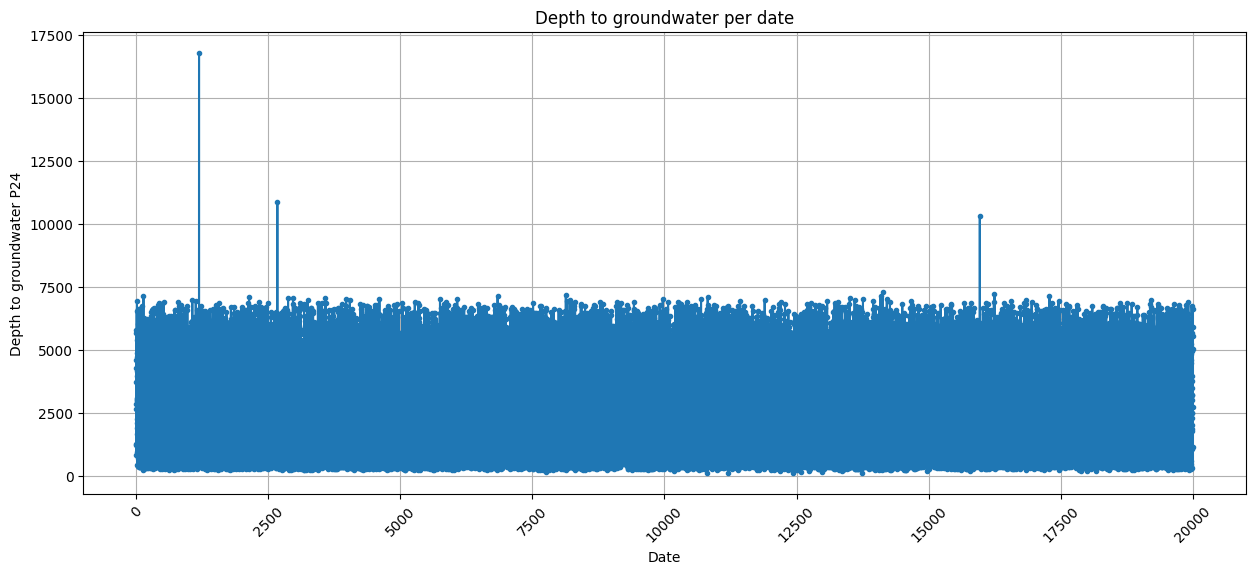

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['traffic_volume'],marker='.')
plt.title("Depth to groundwater per date")
plt.xlabel('Date')
plt.ylabel('Depth to groundwater P24')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

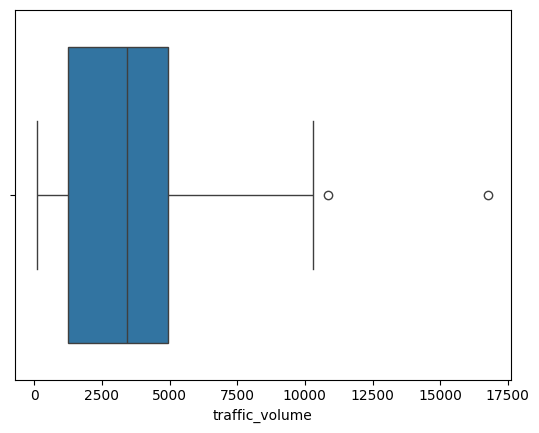

In [13]:
sns.boxplot(x=df['traffic_volume'])
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [14]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [15]:
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

In [16]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [17]:
#If necessary, resample the data to ensure consistent time intervals

df = df.head(1000)

In [18]:
#Create any additional features needed, such as lags or moving averages.

df['traffic_volume_lag_1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag_2'] = df['traffic_volume'].shift(2)


In [19]:
#Make sure that the dates are sorted correctly.

df.sort_values(by='date_time', inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [20]:
#Shift Method: Use the shift method to create a new column prev_traffic_volume, which represents the previous day's traffic volume.

df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df['clouds_all'] = df['clouds_all'].shift(2)


In [21]:
#Difference between traffic_volume: Calculate the difference between the values in traffic_volume column to highlight short-term volume.
df['traffic_volume_diff'] = df['traffic_volume'].diff()
print(df['traffic_volume_diff'])

641       NaN
403    1351.0
644    3746.0
171   -1052.0
928      79.0
        ...  
639   -5196.0
988    4258.0
295    1965.0
788   -1396.0
779   -2586.0
Name: traffic_volume_diff, Length: 1000, dtype: float64


In [22]:
#Date Features


df['date_time'] = pd.to_datetime(df['date_time'])
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['day_of_year'] = df['date_time'].dt.dayofyear
print(df.head())

     traffic_volume    temp  rain_1h  snow_1h  clouds_all weather_main  \
641           562.0  272.62      0.0      0.0         NaN       Clouds   
403          1913.0  267.16      0.0      0.0         NaN        Clear   
644          5659.0  274.96      0.0      0.0        90.0        Clear   
171          4607.0  273.81      0.0      0.0         1.0         Rain   
928          4686.0  274.28      0.0      0.0         1.0          Fog   

    weather_description           date_time  traffic_volume_lag_1  \
641     overcast clouds 2016-11-19 04:00:00                2979.0   
403        sky is clear 2016-11-19 23:00:00                3509.0   
644        sky is clear 2016-11-21 17:00:00                5383.0   
171          light rain 2016-11-22 09:00:00                4144.0   
928                 fog 2016-11-22 15:00:00                2804.0   

     traffic_volume_lag_2  prev_traffic_volume  traffic_volume_diff  \
641                 366.0                  NaN                  NaN  

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [68]:
train_split = round(len(df) * 0.8)
train_data = df.iloc[:train_split]
test_data = df.iloc[train_split:]


(15975, 30) (3994, 30)


In [97]:
#X_train, y_train = create_dataset(train_data_scaled, 30)
#X_test, y_test = create_dataset(test_data_scaled, 30)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

def create_dataset(dataset, time_step=1):
    X, Y = [], []

    data_array = dataset.values
    for i in range(len(data_array) - time_step - 1):
        a = data_array[i:(i + time_step), 0]
        X.append(a)
        Y.append(data_array[i + time_step, 0])
    return np.array(X), np.array(Y)
time_step=30
X, Y = create_dataset(df[['traffic_volume']], time_step)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print(X_train.shape, X_test.shape)

(775, 30) (194, 30)


In [70]:
from sklearn.preprocessing import MinMaxScaler


X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

mimx = MinMaxScaler()
X_train_scaled = mimx.fit_transform(X_train_2d)
X_test_scaled = mimx.transform(X_test_2d)

X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU

# GRU
model = Sequential()

model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [86]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 14034131.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14678986.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14419567.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13964447.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14311207.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14221911.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13853328.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13437885.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13614712.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 14030178.0000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13927516.0000
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 13947986.0000
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13311378.0000
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [87]:
predicted_values_test = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3109.8353422499194
Mean Squared Error (MSE): 13477485.571073001
Root Mean Squared Error (RMSE): 3671.169509989017


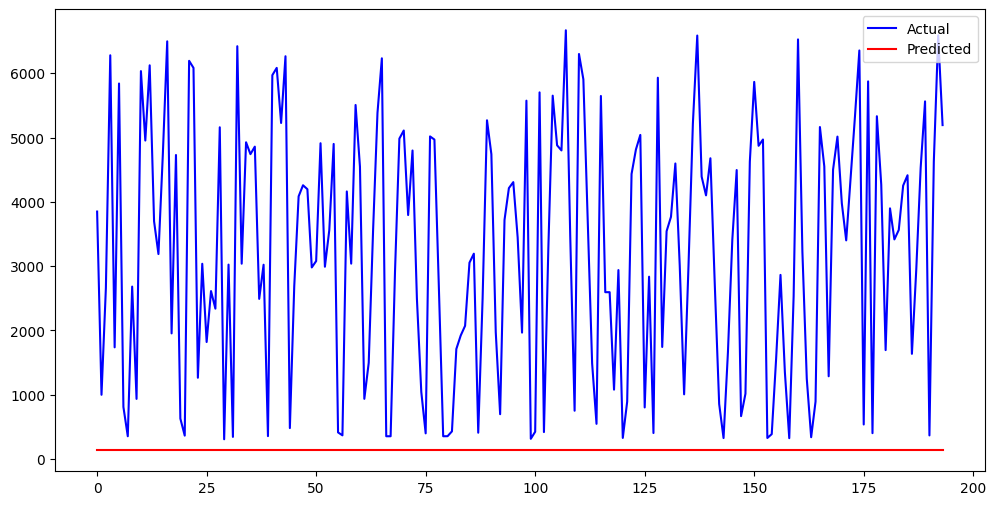

In [84]:
#Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
plt.figure(figsize=(12,6))
plt.plot(Y_test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [50]:
#RNN
from keras.layers import RNN, SimpleRNNCell
model = Sequential()
model.add(RNN(SimpleRNNCell(60), return_sequences=True, input_shape=(X_train.shape[1], 1))) # Use SimpleRNNCell(60) to create a cell
model.add(Dropout(0.2))
model.add(RNN(SimpleRNNCell(50), return_sequences=True))
model.add(Dropout(0.2))
model.add(RNN(SimpleRNNCell(50)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [52]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 14009562.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14466230.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 14853276.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13764687.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14155213.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13527805.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13233607.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14641524.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13178360.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13664486.0000
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14058368.0000
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13992194.0000
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14047415.0000
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━

In [58]:
predictions = model.predict(X_test)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]
 [134.80383]


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3109.8353422499194
Mean Squared Error (MSE): 13477485.571073001
Root Mean Squared Error (RMSE): 3671.169509989017


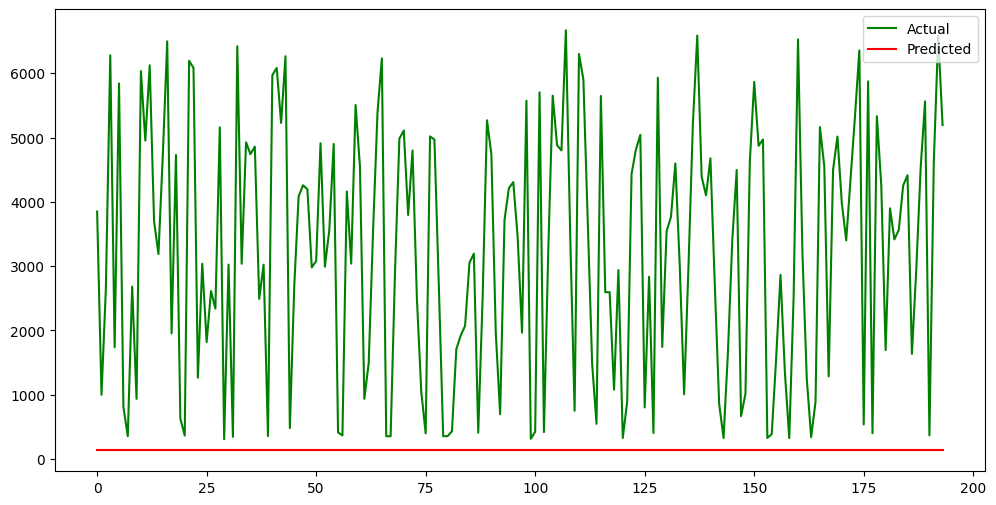

In [90]:
#Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
plt.figure(figsize=(12,6))
plt.plot(Y_test, label='Actual', color='green')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

# Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?

some model not work without normalization , handling missing values missing values is wors one we call .isnull
for discover


# Feature Engineering: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.


  **may bey a mathematical transformation in which we apply a mathematical formula to a particular column (feature) and transform the values, which are useful for our further analysis. It is a technique by which we can boost our model performance.**



# Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?

GUR AND RNN

GRUs are a type of RNN that are similar to LSTMs, but they have a simpler gating mechanism. GRUs are often faster to train than LSTMs, but they may not be as effective for learning long-range  

# Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

**By carefully selecting and experimenting with batch size, number of epochs, and optimizer, you balanced the trade-offs between training speed, stability, and model generalization.**

# Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?

**the primary purpose of a loss function is to guide the learning process of a machine learning model during training by providing a measure**


# Future Improvements: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

**By exploring these improvements, you can potentially enhance model performance, making it more robust and better suited to specific task.**